# 16장. 이미지 인식의 꽃, CNN 익히기

In [23]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(3)

#MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


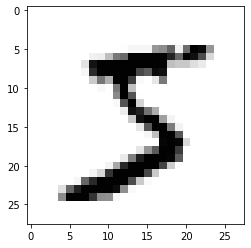

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()
#가로 28*세로 28 = 784개 픽셀

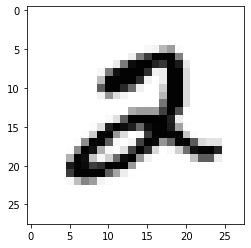

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5], cmap='Greys')
plt.show()
#가로 28*세로 28 = 784개 픽셀

In [17]:
#코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d/t' %i)
    sys.stdout.write('\n')

0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t3/t18/t18/t18/t126/t136/t175/t26/t166/t255/t247/t127/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t0/t30/t36/t94/t154/t170/t253/t253/t253/t253/t253/t225/t172/t253/t242/t195/t64/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t49/t238/t253/t253/t253/t253/t253/t253/t253/t253/t251/t93/t82/t82/t56/t39/t0/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t18/t219/t253/t253/t253/t253/t253/t198/t182/t247/t241/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t0/t80/t156/t107/t253/t253/t205/t11/t0/t43/t154/t0/t0/t0/t0/t0/t0/t0/t0/t0/t0/t
0/t0/t0/t0/t0/t0/t0/t0/t0/t14/t1/t154/t253

In [18]:
X_train = X_train.reshape(X_train.shape[0], 784) #X_train을 1차원배열로
X_train = X_train.astype('float64') #값이 너무 크니 정규화 위해 실수형으로 바꿈
X_train = X_train /255 #가장 큰값인 255로 나눠서 정규화(normalization) 시켜줌

#X_test도 같은 작업해줌.(위에거 한꺼번에 씀)
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [22]:
#클래스 값 확인
print('class:%d' % (Y_class_train[0]))

#바이너리화 과정
Y_train = to_categorical(Y_class_train,10) #10(0~9까지있으니 클래스의 갯수10)
Y_test = to_categorical(Y_class_test, 10)

print(Y_train[0])
print(Y_train[2])

class:5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### 딥러닝 기본 프레임 만들기